## Finite Differences

## Forward Euler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# suppress scientific notation for now
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.4f}'.format

In [47]:
v=0.25
lbg=0.1
k=0.0003
kbg=0.4
I0=300.0
mumax=1.2
rhomax=0.2
m=15.0
qmax=0.04
qmin=0.004
h=120.0
d=10.0
# Redfield ratio = 0.022 for q

A1_guess = 100.0
Rb1_guess = 2.2
Rd1_guess = 30.0

zmax = 50
delta_z = 0.01

In [48]:
def p(I,q):
    return mumax * (1 - qmin/q) * (I/(h + I))

def rho(q, Rd):
    return rhomax * (qmax-q)/(qmax-qmin) * ( Rd/(m + Rd) )

initial_conditions = np.array([A1_guess,
                              -v*A1_guess/d,
                              Rb1_guess,
                              -v*Rb1_guess/d,
                              Rd1_guess,
                              0.0,
                              I0])

np.set_printoptions(suppress=True)
print(initial_conditions)

[100.     -2.5     2.2    -0.055  30.      0.    300.   ]


In [86]:
def step_forward(y, z_start, delta_z):
    """Forward Euler next step where y is a vector of length 7 of initial guesses."""
    A1 = y[0]
    A2 = y[1]
    Rb1 = y[2]
    Rb2 = y[3]
    Rd1 = y[4]
    Rd2 = y[5]
    I = y[6]
    q = Rb1/A1
    
    A1_next = A1 + delta_z*A2
    A2_next = A2 + (delta_z/d)*(v*A2 + p(I,q)*A1 - lbg*A1)
    Rb1_next = Rb1 + delta_z*Rb2
    Rb2_next = Rb2 + (delta_z/d)*(v*Rb2 + rho(q,Rd1)*A1 - lbg*Rb1)
    Rd1_next = Rd1 + delta_z*Rd2
    Rd2_next = Rd2 + (delta_z/d)*(-rho(q,Rd1)*A1 + lbg*Rb1)
    I_next = I - delta_z*(k*A1 + kbg)*I
    
    return np.array([A1_next,
                     A2_next,
                     Rb1_next,
                     Rb2_next,
                     Rd1_next,
                     Rd2_next,
                     I_next])

In [87]:
first_step = step_forward(initial_conditions,0,delta_z)
stepdict = {'z0': initial_conditions, 'z1': first_step}
pd.DataFrame(stepdict, index=['A1','A2','Rb1','Rb2','Rd1','Rd2','I'])

z0       z1
A1  100.0000 100.0000
A2   -2.5000  -2.4999
Rb1   2.2000   2.2000
Rb2  -0.0550  -0.0550
Rd1  30.0000  30.0000
Rd2   0.0000  -0.0000
I   300.0000 299.9987

## Stepping over z

In [88]:
z_steps = np.arange(0.0,zmax,delta_z) 
steps = np.empty([len(initial_conditions),len(z_steps)])
steps[:,0] = initial_conditions

i=0
for z in z_steps[:-1]:
    i=i+1
    steps[:,i] = step_forward(steps[:,i-1], z, delta_z)

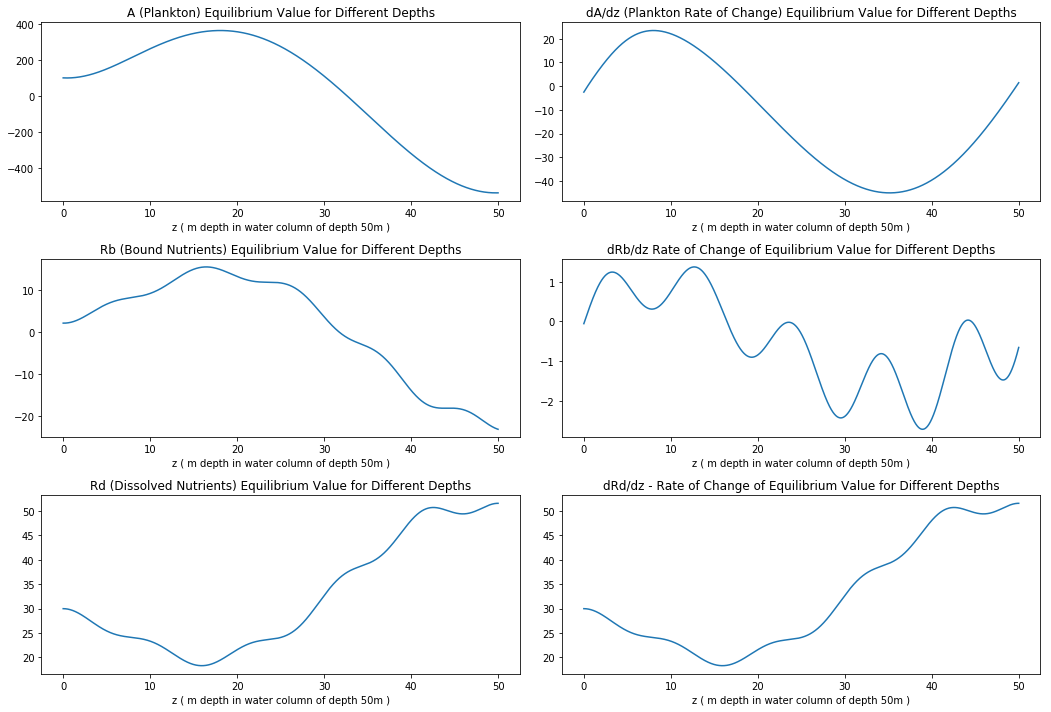

In [89]:
fig, axs = plt.subplots(3,2, figsize=(15,10))

axs[0,0].plot(z_steps,steps[0,:])
axs[0,0].set_title('A (Plankton) Equilibrium Value for Different Depths')
axs[0,0].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[0,1].plot(z_steps,steps[1,:])
axs[0,1].set_title('dA/dz (Plankton Rate of Change) Equilibrium Value for Different Depths')
axs[0,1].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[1,0].plot(z_steps,steps[2,:])
axs[1,0].set_title('Rb (Bound Nutrients) Equilibrium Value for Different Depths')
axs[1,0].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[1,1].plot(z_steps,steps[3,:])
axs[1,1].set_title('dRb/dz Rate of Change of Equilibrium Value for Different Depths')
axs[1,1].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[2,0].plot(z_steps,steps[4,:])
axs[2,0].set_title('Rd (Dissolved Nutrients) Equilibrium Value for Different Depths')
axs[2,0].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[2,1].plot(z_steps,steps[4,:])
axs[2,1].set_title('dRd/dz - Rate of Change of Equilibrium Value for Different Depths')
axs[2,1].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

plt.tight_layout()

Text(0.5, 0, 'z ( m depth in water column of depth 50m )')

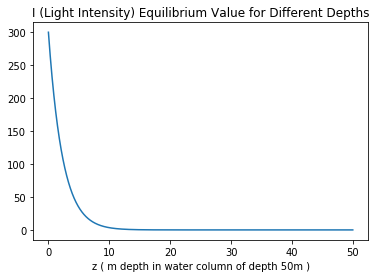

In [90]:
plt.plot(z_steps,steps[6,:])
plt.title('I (Light Intensity) Equilibrium Value for Different Depths')
plt.xlabel('z ( m depth in water column of depth {}m )'.format(zmax))


In [76]:
steps_df = pd.DataFrame(steps, index = ['A1','A2','Rb1','Rb2','Rd1','Rd2','I'])
steps_df

0        1        2        3        4        5        6        7        \
A1  100.0000 100.0000 100.0000  99.9999  99.9999  99.9999  99.9999  99.9998   
A2   -2.5000  -2.4999  -2.4999  -2.4998  -2.4998  -2.4997  -2.4996  -2.4996   
Rb1   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   
Rb2  -0.0550  -0.0550  -0.0550  -0.0550  -0.0550  -0.0550  -0.0550  -0.0550   
Rd1  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000   
Rd2   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   
I   300.0000 299.9987 299.9974 299.9961 299.9948 299.9936 299.9923 299.9910   

     8        9        ...   4999990   4999991   4999992   4999993   4999994  \
A1   99.9998  99.9998  ... -539.6685 -539.6685 -539.6685 -539.6685 -539.6685   
A2   -2.4995  -2.4995  ...    1.4543    1.4544    1.4544    1.4545    1.4545   
Rb1   2.2000   2.2000  ...  -19.8946  -19.8946  -19.8946  -19.8946  -19.8946   
Rb2  -0.0549  -0.0549  ...    0.4434    0.4434    0.4434    0.4434    0.4434   
Rd1  30.0000  30.0000  ...  184.4596  184.4597  184.4597  184.4597  184.4597   
Rd2   0.0001   0.0001  ...    2.4377    2.4377    2.4377    2.4377    2.4377   
I   299.9897 299.9884  ...    0.0000    0.0000    0.0000    0.0000    0.0000   

      4999995   4999996   4999997   4999998   4999999  
A1  -539.6685 -539.6684 -539.6684 -539.6684 -539.6684  
A2     1.4546    1.4547    1.4547    1.4548    1.4548  
Rb1  -19.8946  -19.8946  -19.8946  -19.8946  -19.8946  
Rb2    0.4434    0.4434    0.4434    0.4434    0.4434  
Rd1  184.4598  184.4598  184.4598  184.4598  184.4599  
Rd2    2.4377    2.4377    2.4377    2.4376    2.4376  
I      0.0000    0.0000    0.0000    0.0000    0.0000  

[7 rows x 5000000 columns]

**Note**: changed equations to:

    A1' = -A2
    Rb1' = -Rb2
    Rd1' = -Rd2
    
and this seemed to resolve all the blowing up in forward Euler but I don't understand why it's ok to do. Something to do with 

    A1 goes down when A2 > 0

## Central Difference Method

In [63]:
def step_forward_cdm(y0,y1, z_start, delta_z):
    """Cental Differemnce/Forward Euler next step where y1 and y0 are vectors of length 4 of initial guesses."""
    A0 = y0[0]
    Rb0 = y0[1]
    Rd0 = y0[2]
    I0 = y0[3]
    
    A1 = y1[0] #
    Rb1 = y1[1] #
    Rd1 = y1[2]
    I1 = y1[3]
    
    q = Rb1/A1
    
    A_next = delta_z**2/(v*delta_z - d) * ( (-p(I1,q) + lbg + v/delta_z - 2*d/delta_z**2)*A1 ) + d*A0/(v*delta_z-d)
    
    Rb_next = delta_z**2/(v*delta_z - d) * ( -rho(q,Rd1)*A1 + (v/delta_z + lbg - 2*d/delta_z**2)*Rb1) + d*Rb0/(v*delta_z-d)
    
    Rd_next = delta_z**2/d * (-rho(q,Rd1)*A1 + lbg*Rb1) + 2*Rd1 - Rd0
    
    I_next = - delta_z * (k*A1 + kbg )*I1 + I1 
    
    return np.array([A_next,
                     Rb_next,
                     Rd_next,
                     I_next])

In [64]:
initial_conditions0 = initial_conditions[[0,2,4,6]]
initial_conditions1 = first_step[[0,2,4,6]]

In [65]:
delta_z = 0.00001 # blowing up
z_steps = np.arange(0.0,zmax,delta_z) 

steps_cdm = np.empty([len(initial_conditions0),len(z_steps)])
steps_cdm[:,0] = initial_conditions0
steps_cdm[:,1] = initial_conditions1

In [66]:
i=1
for z in z_steps[:-2]:
    i=i+1
    #print(i)
    steps_cdm[:,i] = step_forward_cdm(steps_cdm[:,i-2],steps_cdm[:,i-1], z, delta_z)
    
# Note: overflow/invalid value encountered in double_scalar encountered at i = 1408

In [67]:
steps_cdm_df = pd.DataFrame(steps_cdm, index=['A','Rb','Rd','I'])
steps_cdm_df

0        1        2        3        4        5        6        7        \
A  100.0000 100.0250 100.0500 100.0750 100.1000 100.1250 100.1500 100.1750   
Rb   2.2000   2.2006   2.2011   2.2017   2.2022   2.2028   2.2033   2.2039   
Rd  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000   
I  300.0000 298.7100 298.7087 298.7074 298.7061 298.7049 298.7036 298.7023   

    8        9        ...     4999990     4999991     4999992     4999993  \
A  100.2000 100.2250  ... -50565.7000 -50565.6941 -50565.6883 -50565.6824   
Rb   2.2044   2.2050  ...  -2217.6468  -2217.6473  -2217.6479  -2217.6484   
Rd  30.0000  30.0000  ...   4981.0808   4981.0813   4981.0818   4981.0824   
I  298.7010 298.6997  ...      0.0000      0.0000      0.0000      0.0000   

       4999994     4999995     4999996     4999997     4999998     4999999  
A  -50565.6766 -50565.6707 -50565.6648 -50565.6590 -50565.6531 -50565.6473  
Rb  -2217.6490  -2217.6495  -2217.6500  -2217.6506  -2217.6511  -2217.6517  
Rd   4981.0829   4981.0835   4981.0840   4981.0845   4981.0851   4981.0856  
I       0.0000      0.0000      0.0000      0.0000      0.0000      0.0000  

[4 rows x 5000000 columns]

In [68]:
#nullval = steps_cdm_df.columns[steps_cdm_df.isnull().any()][0]
#print("So the values become null at step {} and Rd is infinity at {}.".format(nullval,nullval-1))

In [69]:
#steps_cdm_df.iloc[:,nullval-1]

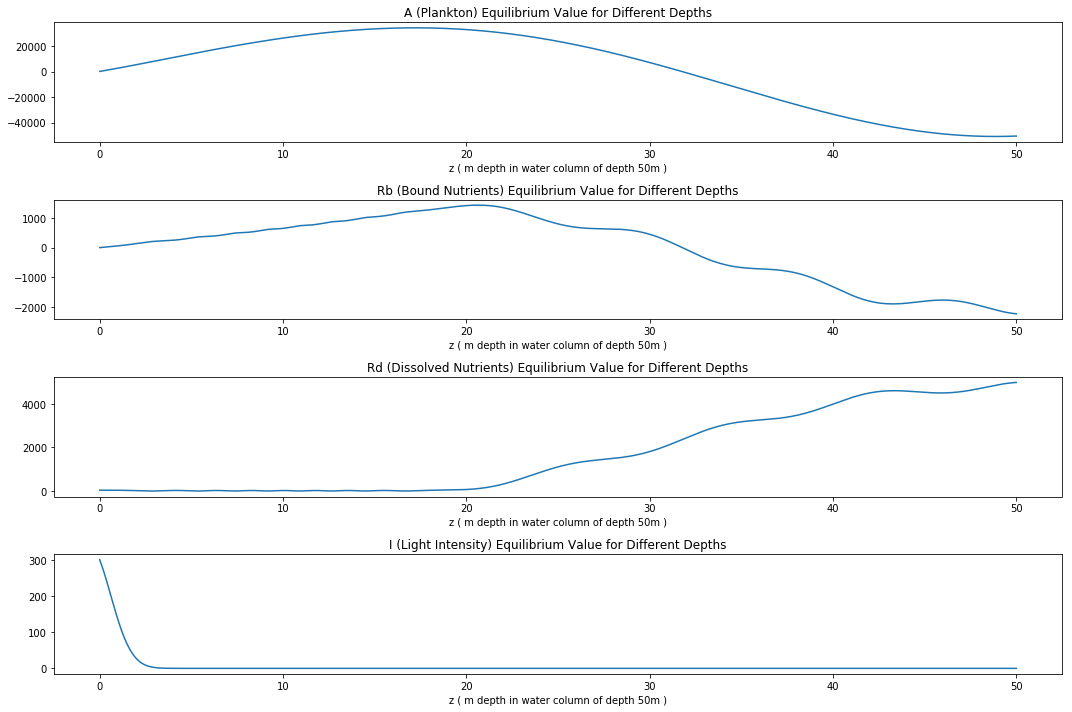

In [70]:
fig, axs = plt.subplots(4, figsize=(15,10))

axs[0].plot(z_steps,steps_cdm[0,:])
axs[0].set_title('A (Plankton) Equilibrium Value for Different Depths')
axs[0].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[1].plot(z_steps,steps_cdm[1,:])
axs[1].set_title('Rb (Bound Nutrients) Equilibrium Value for Different Depths')
axs[1].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[2].plot(z_steps,steps_cdm[2,:])
axs[2].set_title('Rd (Dissolved Nutrients) Equilibrium Value for Different Depths')
axs[2].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[3].plot(z_steps,steps_cdm[3,:])
axs[3].set_title('I (Light Intensity) Equilibrium Value for Different Depths')
axs[3].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

plt.tight_layout()

In [62]:
(rho(q,Rd1)*A1 - lbg*Rb1)

NameError: name 'q' is not defined